# HLA Run Comparison


***
## Imports:

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd


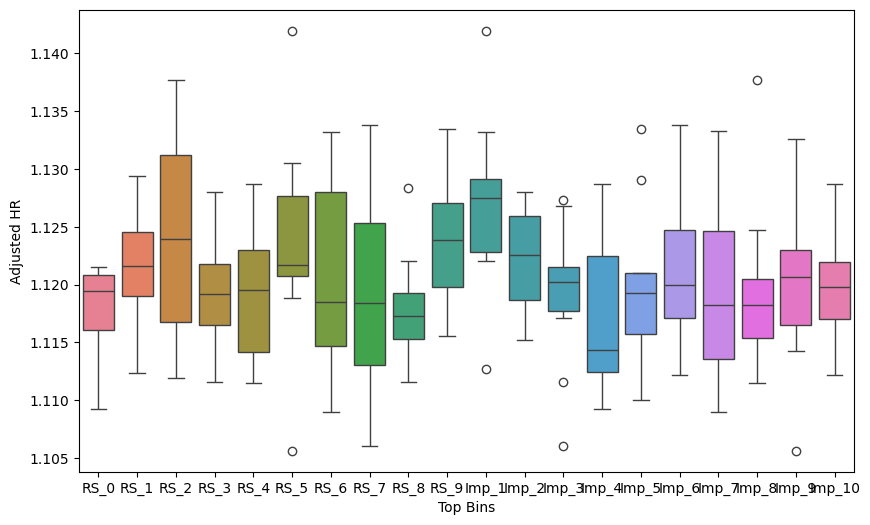

<Figure size 640x480 with 0 Axes>

In [14]:
# Load data from CSV file
filename = '/project/kamoun_shared/output_shared/bandheyh/output/Fibers2.0_hla_filtered_7locus_baseline/Fibers2.0_hla_filtered_7locus_baseline_summary.csv'
target = 'Adjusted HR'
datastart = 'NewImp_'
seedname = 'Random Seed'
dataname = 'Dataset Filename'

df = pd.read_csv(filename)

imps = 10
seeds = 10

sets = []
avgs = []
sds = []
names = []

for i in range(0,seeds):
    filtered_df = df[df[seedname] == i]
    my_list = filtered_df[target].tolist()
    sets.append(my_list)
    avgs.append(np.mean(my_list))
    sds.append(np.std(my_list))
    names.append('RS_'+str(i))

for i in range (1,imps+1):
    filtered_df = df[df[dataname] == datastart+str(i)]
    my_list = filtered_df[target].tolist()
    sets.append(my_list)
    avgs.append(np.mean(my_list))
    sds.append(np.std(my_list))
    names.append('Imp_'+str(i))

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=sets)
plt.xticks(range(len(sets)), names)
plt.ylabel(target)
plt.xlabel('Top Bins')
plt.show()

plt.savefig('boxplot.png')